# Linear regression modeiling on Bike sharing Data

- Kartik Mehra
- kartikmhr97@gmail.com

In [1]:
#importing necessary libararies
import pandas as pd
import numpy as np

import matplotlib.pyplot as pt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data set
dataSet = pd.read_csv('day.csv')

In [3]:
dataSet.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
pd.to_datetime(dataSet.dteday)

0     2018-01-01
1     2018-02-01
2     2018-03-01
3     2018-04-01
4     2018-05-01
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]

In [5]:
#checking the shape of the dataset
dataSet.shape

(730, 16)

In [6]:
#checking the datatypes of all the varaibles
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### As instant and dteday are redundant because instant is like the index and the dteday dat is explained by the other columns so we will remove these columns

In [7]:
dataSet.drop(['instant','dteday'],axis=1,inplace=True)

In [8]:
dataSet.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### 1) Checking if there are any null values or incorrect data

In [9]:
dataSet.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [10]:
dataSet.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
dataSet.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
dataSet.drop_duplicates().shape

(730, 14)

- The shape of the dataset ater removing the duplicates is same as the original data so no duplicates

## Correcting the data 
- We have some categorical data which needs to be correct for analysis

In [13]:
dataSet.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12)
                     ,("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
                     ,inplace=True)

In [14]:
dataSet.yr.replace((0,1)
                     ,('2018','2019')
                     ,inplace=True)

In [15]:
dataSet.season.replace((1,2,3,4) 
                       ,('Spring','Summer','Fall','Winter')
                       ,inplace=True)

In [16]:
# AS the value of workingday for weekday 0 and 6 is 0 hence the 0 means Sunday and 6 means Saturday
dataSet.weekday.replace((0,1,2,3,4,5,6)
                        ,('Sun','Mon','Tues','Wed','Thur','Fri','Sat')
                        ,inplace=True)


In [17]:
dataSet.weathersit.replace((1,2,3,4)
                        ,('Clear/Partial Cloudy','Misty','Light Rain/Snow','Heavy Rain/Snow')
                        ,inplace=True)


In [18]:
dataSet.weekday.value_counts()

Tues    105
Mon     105
Fri     104
Sun     104
Wed     104
Thur    104
Sat     104
Name: weekday, dtype: int64

In [19]:
dataSet.describe()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Variable analysis

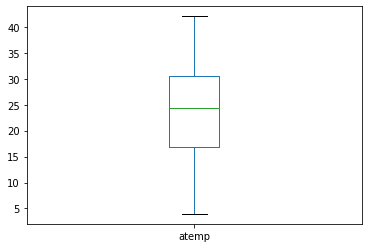

In [20]:
dataSet.atemp.plot.box()
pt.show()

We see no outliers that needs to be handled so its good

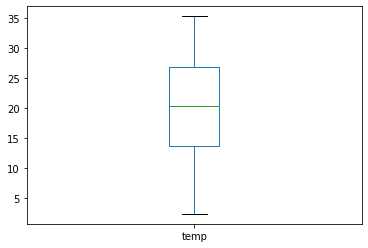

In [21]:
dataSet.temp.plot.box()
pt.show()

__temp__ also doesn't have any outliers.

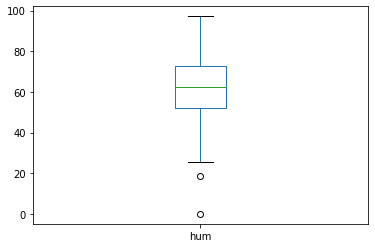

In [22]:
dataSet.hum.plot.box()
pt.show()

__hum__ has 2 outliers but we can include as these are not some impractical data

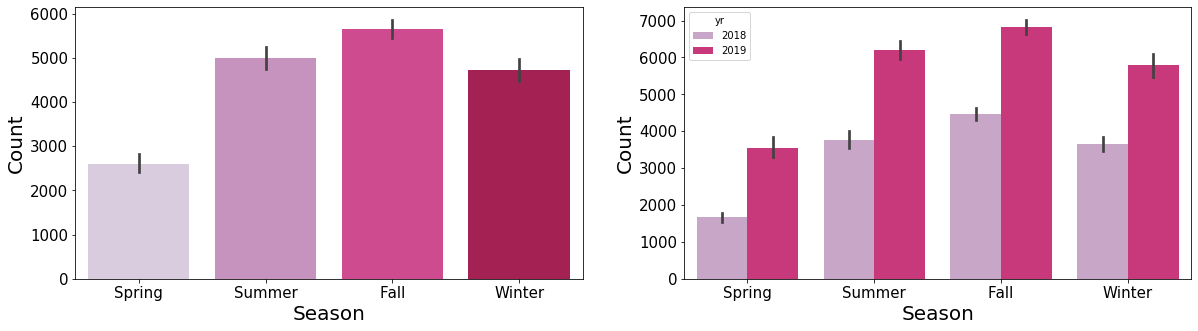

In [23]:
# dataSet.season.value_counts().plot(kind='hist')
pt.figure(figsize=(20,5))
pt.subplot(1,2,1)
sns.barplot(x = dataSet.season,y=dataSet.cnt,palette='PuRd')
pt.xlabel('Season',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.subplot(1,2,2)
sns.barplot(x = dataSet.season,y=dataSet.cnt,hue=dataSet.yr,palette='PuRd')
pt.xlabel('Season',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.show()

- For both years the total count of bike rented is more in Fall

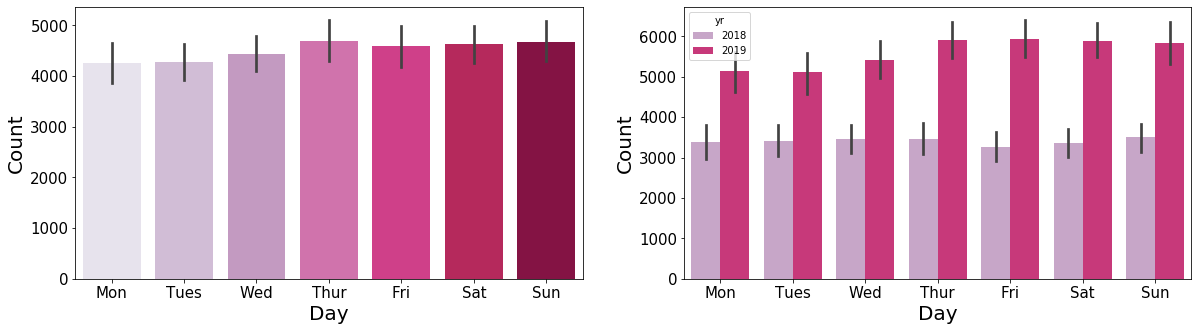

In [24]:
# dataSet.season.value_counts().plot(kind='hist')
pt.figure(figsize=(20,5))
pt.subplot(1,2,1)
sns.barplot(x = dataSet.weekday,y=dataSet.cnt,palette='PuRd')
pt.xlabel('Day',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.subplot(1,2,2)
sns.barplot(x = dataSet.weekday,y=dataSet.cnt,hue=dataSet.yr,palette='PuRd')
pt.xlabel('Day',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.show()

- Here we have slight differences between the days bike rental count 
    - Mon and Tues data looks similar
    - Then thre rest of the days there is very minute difference in the count

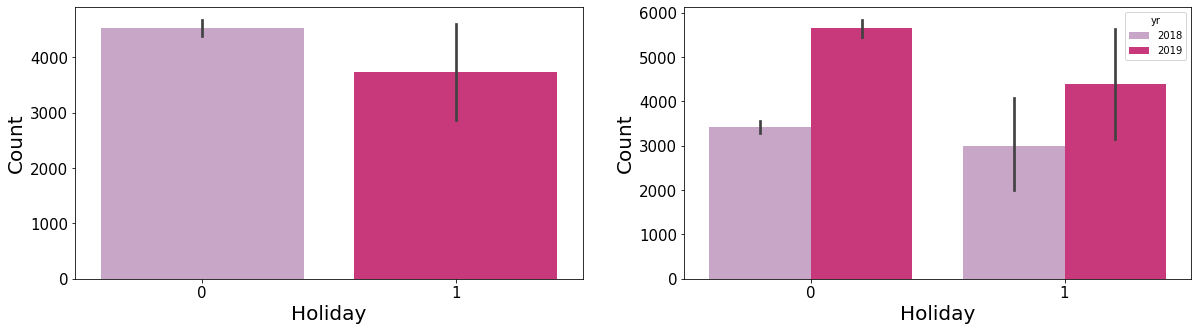

In [25]:
# dataSet.season.value_counts().plot(kind='hist')
pt.figure(figsize=(20,5))
pt.subplot(1,2,1)
sns.barplot(x = dataSet.holiday,y=dataSet.cnt,palette='PuRd')
pt.xlabel('Holiday',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.subplot(1,2,2)
sns.barplot(x = dataSet.holiday,y=dataSet.cnt,hue=dataSet.yr,palette='PuRd')
pt.xlabel('Holiday',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.show()

- When its not a holiday then the bike rental count is more means people don't use bikes on holidays, this could be because the offices and workplace are not open so those group of people stay at home

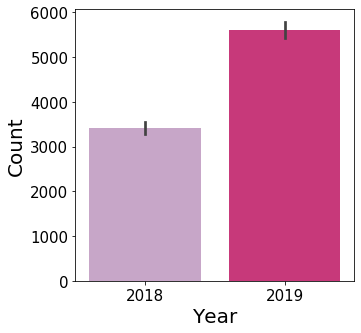

In [26]:
# dataSet.season.value_counts().plot(kind='hist')
pt.figure(figsize=(5,5))
sns.barplot(x = dataSet.yr,y=dataSet.cnt,palette='PuRd')
pt.xlabel('Year',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.show()

- The Overall count of bike rented increased in 2019

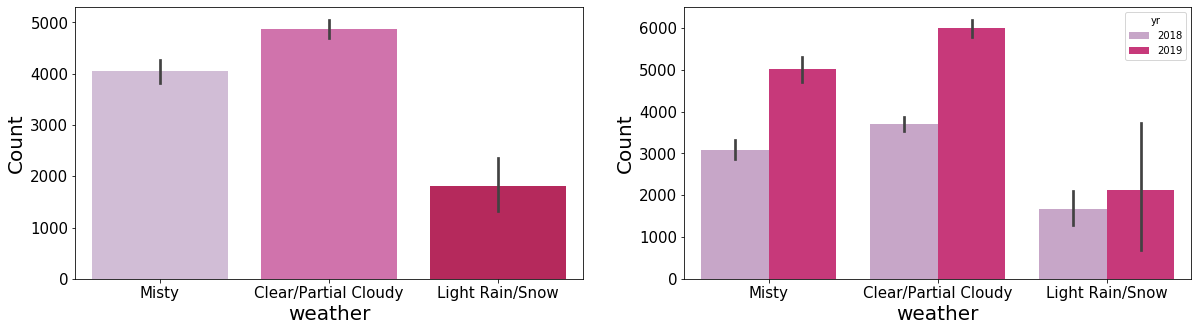

In [27]:
# dataSet.season.value_counts().plot(kind='hist')
pt.figure(figsize=(20,5))
pt.subplot(1,2,1)
sns.barplot(x = dataSet.weathersit,y=dataSet.cnt,palette='PuRd')
pt.xlabel('weather',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.subplot(1,2,2)
sns.barplot(x = dataSet.weathersit,y=dataSet.cnt,hue=dataSet.yr,palette='PuRd')
pt.xlabel('weather',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.show()

- People preffer to rent bikes more on clear or partialy cloudy day and least on light snowy or rainy days

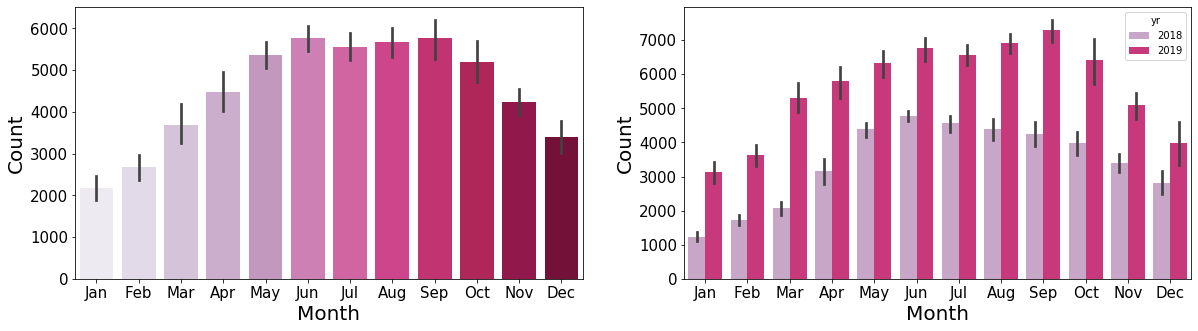

In [28]:
# dataSet.season.value_counts().plot(kind='hist')
pt.figure(figsize=(20,5))
pt.subplot(1,2,1)
sns.barplot(x = dataSet.mnth,y=dataSet.cnt,palette='PuRd')
pt.xlabel('Month',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.subplot(1,2,2)
sns.barplot(x = dataSet.mnth,y=dataSet.cnt,hue=dataSet.yr,palette='PuRd')
pt.xlabel('Month',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.show()

- The count of the bikes rented gradually increases from january till Jun and from then till september it remauns somewhat similar with minute differences and then it decreases till december for both the years

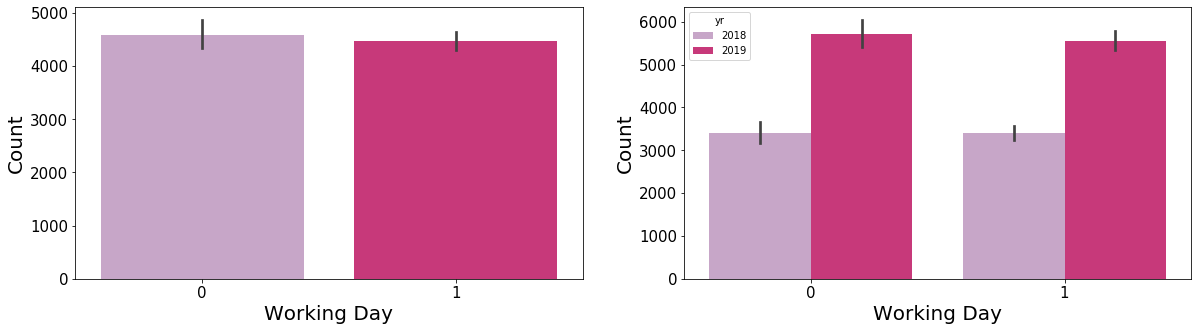

In [29]:
# dataSet.season.value_counts().plot(kind='hist')
pt.figure(figsize=(20,5))
pt.subplot(1,2,1)
sns.barplot(x = dataSet.workingday ,y=dataSet.cnt,palette='PuRd')
pt.xlabel('Working Day',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.subplot(1,2,2)
sns.barplot(x = dataSet.workingday ,y=dataSet.cnt,hue=dataSet.yr,palette='PuRd')
pt.xlabel('Working Day',fontdict={'fontsize':20})
pt.ylabel('Count',fontdict={'fontsize':20})
pt.xticks(fontsize=15)
pt.yticks(fontsize=15)
pt.show()

- Very less difference between working and non working days rental count

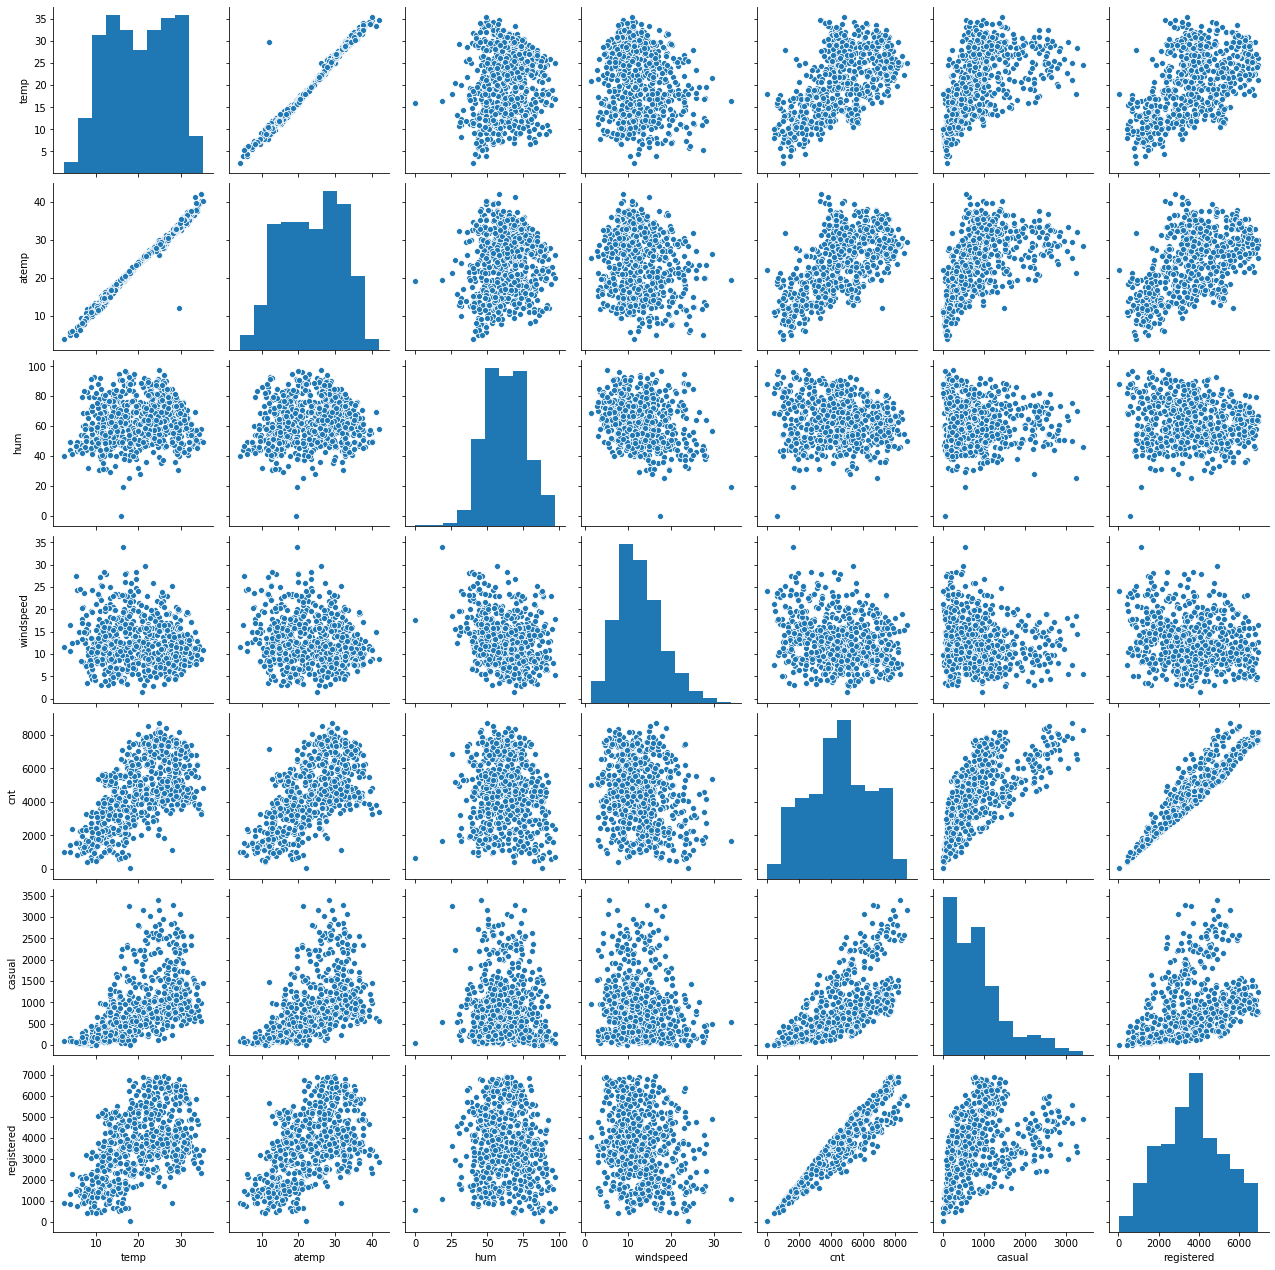

In [30]:
# numData = dataSet[['temp','atemp','hum','windspeed','cnt']]
numerical_colums = ['temp','atemp','hum','windspeed','cnt','casual','registered']
sns.pairplot(dataSet[numerical_colums])
pt.show()

- There is strong possitive pattern obeserved for temp and atemp which seems correct
- There is some pattern observed between count and the temp variable

# 1) Checking Correlation

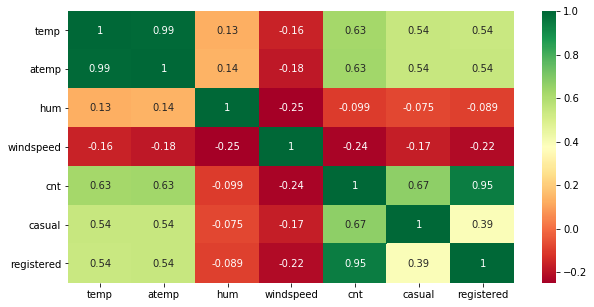

In [31]:
pt.figure(figsize=(10,5))
sns.heatmap(dataSet[numerical_colums].corr(),annot=True,cmap='RdYlGn')
pt.show()

- temp and atemp are strongly possitvely correlated
- cnt and temp are possitively correlated
- cnt and registered are possitively correlated

# 2) Converting the data to create dummy for modeling

In [32]:
seasonDummies = pd.get_dummies(dataSet.season,drop_first=True)
seasonDummies.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [33]:
weatherDummies = pd.get_dummies(dataSet.weathersit,drop_first=True)
weatherDummies.head()

,Light Rain/Snow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [34]:
dataSet.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,2018,Jan,0,Tues,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,2018,Jan,0,Wed,1,Clear/Partial Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,2018,Jan,0,Thur,1,Clear/Partial Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,2018,Jan,0,Fri,1,Clear/Partial Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [35]:
WeekDayDummies = pd.get_dummies(dataSet.weekday,drop_first=True)
WeekDayDummies.head()

,Mon,Sat,Sun,Thur,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [36]:
mnthDummies = pd.get_dummies(dataSet.mnth,drop_first=True)
mnthDummies.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [37]:
yearDummies = pd.get_dummies(dataSet.yr,drop_first=True)
yearDummies.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [38]:
dataSet.yr.value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [39]:
dataSet.yr = yearDummies['2019']

# 3) Remove the multicollinear and redundant columns

- Here the casual and registered count is directlylinked to the count so we can remove those two
- Temp and atemp are also higly correlated so we will remove atemp

In [40]:
dataSet_with_dummies= dataSet.drop(['season','weekday','mnth','weathersit','atemp','registered',
                                   'casual'],axis=1)
dataSet_with_dummies = pd.concat([dataSet_with_dummies,seasonDummies,weatherDummies,WeekDayDummies,mnthDummies],axis=1)

In [41]:
dataSet_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    uint8  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   Spring           730 non-null    uint8  
 8   Summer           730 non-null    uint8  
 9   Winter           730 non-null    uint8  
 10  Light Rain/Snow  730 non-null    uint8  
 11  Misty            730 non-null    uint8  
 12  Mon              730 non-null    uint8  
 13  Sat              730 non-null    uint8  
 14  Sun              730 non-null    uint8  
 15  Thur             730 non-null    uint8  
 16  Tues             730 non-null    uint8  
 17  Wed             

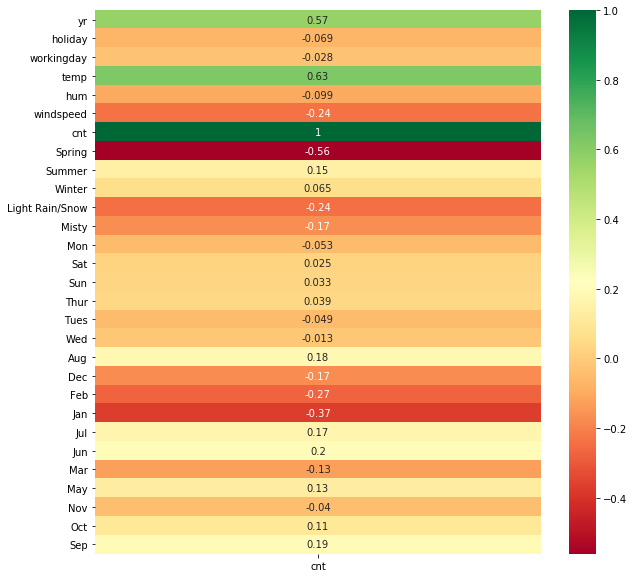

In [42]:
pt.figure(figsize=(10,10))
corrData = dataSet_with_dummies.corr()

sns.heatmap(corrData[['cnt']],annot=True,cmap='RdYlGn')
pt.show()

#### Cheking the correlation of count variable with all the others for modeling

# 4) Generating the training and testing data

In [43]:
train_dataSet, test_dataSet =  train_test_split(dataSet_with_dummies ,train_size=0.7,  test_size = 0.3, random_state = 400)

In [44]:
scaler = MinMaxScaler()

In [45]:
columns_to_scale = ['temp','windspeed','cnt','hum']
train_dataSet[columns_to_scale] = scaler.fit_transform(train_dataSet[columns_to_scale])

In [46]:
train_dataSet[columns_to_scale].head()

,temp,windspeed,cnt,hum
205,0.866039,0.171091,0.410855,0.700115
351,0.226828,0.368576,0.240542,0.462297
660,0.613942,0.180438,0.849148,0.539443
265,0.696217,0.139978,0.236190,1.000000
27,0.182710,0.252344,0.087755,0.750176


# 5) Creating the linier regression with feature selection

In [47]:
Y_train = train_dataSet.pop('cnt')
X_train = train_dataSet

In [48]:
def cal_variance(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif[vif.Features!='const']

In [49]:
Y = Y_train
X = X_train[['temp']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     341.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.08e-58
Time:                        20:16:37   Log-Likelihood:                 141.00
No. Observations:                 510   AIC:                            -278.0
Df Residuals:                     508   BIC:                            -269.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1362      0.021      6.444      0.0

,Features,VIF
1,temp,1.0


This is the starting model and we got R-square as __0.402__ which is ok and the p-value is also significant.

- For the next part we will add year column( __yr__ )

In [50]:
Y = Y_train
X = X_train[['temp','yr']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     594.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.26e-133
Time:                        20:16:37   Log-Likelihood:                 317.72
No. Observations:                 510   AIC:                            -629.4
Df Residuals:                     507   BIC:                            -616.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0306      0.016      1.952      0.0

,Features,VIF
1,temp,1.01
2,yr,1.01


In this model got R-sqaure as __0.701__ and adjusted-R-square as __0.700__ which is quite well and the p-value is also significant.

- For the next part we will add Spring column

In [51]:
Y = Y_train
X = X_train[['temp','yr','Spring']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     508.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.57e-152
Time:                        20:16:37   Log-Likelihood:                 364.48
No. Observations:                 510   AIC:                            -721.0
Df Residuals:                     506   BIC:                            -704.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1663      0.020      8.465      0.0

,Features,VIF
1,temp,1.62
3,Spring,1.61
2,yr,1.01


Now the R-sqaure improved to __0.751__ and adjusted-R-square to __0.750__ which is quite well and the p-value is also 0 means  the variables are significant.

- For the next part we will add Winter column and see what happens

In [52]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     394.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.02e-153
Time:                        20:16:37   Log-Likelihood:                 370.98
No. Observations:                 510   AIC:                            -732.0
Df Residuals:                     505   BIC:                            -710.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.027      3.777      0.0

,Features,VIF
3,Spring,2.59
1,temp,2.53
4,Winter,1.72
2,yr,1.01


In this model R-sqaure improved to __0.757__ and adjusted-R-square to __0.755__ which is an improvement and the p-value is also 0.

- For the next part we will add Summer column and see what happens

In [53]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','Summer']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     319.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.13e-153
Time:                        20:16:37   Log-Likelihood:                 373.97
No. Observations:                 510   AIC:                            -735.9
Df Residuals:                     504   BIC:                            -710.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0475      0.034      1.385      0.1

,Features,VIF
3,Spring,4.34
1,temp,3.29
4,Winter,2.89
5,Summer,1.89
2,yr,1.01


In this model R-sqaure and adjusted R-square improved by __0.3%__ and the VIF of spring also increased so we will not include Summer for now.

- For the next part we will add Sep column and see what happens

In [54]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','Sep']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     318.9
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.57e-153
Time:                        20:16:38   Log-Likelihood:                 373.63
No. Observations:                 510   AIC:                            -735.3
Df Residuals:                     504   BIC:                            -709.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1011      0.027      3.813      0.0

,Features,VIF
3,Spring,2.59
1,temp,2.55
4,Winter,1.72
5,Sep,1.04
2,yr,1.01


In this model also the R-Square increased by 0.3% and the p-vlaue of september came to be 2.2% which is ok but still we will try to build a model with less p-values so we will not include Sep 

- For the next part we will add hum column and see what happens

In [55]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','hum']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     361.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          5.48e-164
Time:                        20:16:38   Log-Likelihood:                 398.04
No. Observations:                 510   AIC:                            -784.1
Df Residuals:                     504   BIC:                            -758.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1900      0.028      6.801      0.0

,Features,VIF
3,Spring,2.59
1,temp,2.56
4,Winter,1.76
5,hum,1.08
2,yr,1.04


There is an increment of around __2%__  in the r_square and adjusted r_square, also the p-values of the all teh varaibles are 0 so we will include this. 

In [56]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','hum','Misty']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.34e-163
Time:                        20:16:38   Log-Likelihood:                 399.61
No. Observations:                 510   AIC:                            -785.2
Df Residuals:                     503   BIC:                            -755.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1896      0.028      6.801      0.0

,Features,VIF
1,temp,2.63
3,Spring,2.60
4,Winter,1.78
5,hum,1.41
6,Misty,1.32
2,yr,1.04


So by adding the Misty the R-sqaure improved to __0.783__ and adjusted-R-square to __0.781__ but the pvalue of misty is __7.9%__ which is not good , also there is not a good improvement in r_squared and adjusted r_square. For now we will try to remove hum and keep the misty to see if it improves

- For the next part we will add Jul column and see what happens

In [57]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','hum','Jul']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     313.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.42e-166
Time:                        20:16:38   Log-Likelihood:                 406.59
No. Observations:                 510   AIC:                            -799.2
Df Residuals:                     503   BIC:                            -769.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1744      0.028      6.284      0.0

,Features,VIF
1,temp,2.87
3,Spring,2.61
4,Winter,1.76
6,Jul,1.22
5,hum,1.10
2,yr,1.04


All the variables are significant and the r_square improved by __0.6%__ and the adjusted r_square by __0.5%__ so we will include this.
- Now we will add another variable

In [58]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','hum','Jul','Nov']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     276.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.26e-167
Time:                        20:16:38   Log-Likelihood:                 412.58
No. Observations:                 510   AIC:                            -809.2
Df Residuals:                     502   BIC:                            -775.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1904      0.028      6.838      0.0

,Features,VIF
1,temp,2.93
3,Spring,2.65
4,Winter,2.01
7,Nov,1.39
6,Jul,1.22
5,hum,1.10
2,yr,1.04


All the variables are significant and the r_square and adjusted r_square improved by __0.5%__ so we will include this.
- Now we will add another variable

In [59]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','hum','Jul','Nov','holiday']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     243.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.57e-167
Time:                        20:16:38   Log-Likelihood:                 414.75
No. Observations:                 510   AIC:                            -811.5
Df Residuals:                     501   BIC:                            -773.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1906      0.028      6.867      0.0

,Features,VIF
1,temp,2.93
3,Spring,2.66
4,Winter,2.01
7,Nov,1.39
6,Jul,1.22
5,hum,1.10
2,yr,1.04
8,holiday,1.01


There is no significant increase in the adjusted r_square and also the p-value of holiday is __3.9%__ so we will not include holiday and another another variable.

In [60]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','hum','Jul','Nov','Light Rain/Snow']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     270.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.49e-176
Time:                        20:16:38   Log-Likelihood:                 435.94
No. Observations:                 510   AIC:                            -853.9
Df Residuals:                     501   BIC:                            -815.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1840      0.027     

,Features,VIF
1,temp,2.99
3,Spring,2.66
4,Winter,2.01
7,Nov,1.39
5,hum,1.25
6,Jul,1.23
8,Light Rain/Snow,1.15
2,yr,1.04


We see around __1.7%__ increase in adjusted r_square which means after including this the model has impoved.

In [61]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','hum','Jul','Nov','Light Rain/Snow','windspeed']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          4.31e-183
Time:                        20:16:38   Log-Likelihood:                 454.77
No. Observations:                 510   AIC:                            -889.5
Df Residuals:                     500   BIC:                            -847.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2779      0.030     

,Features,VIF
1,temp,2.99
3,Spring,2.66
4,Winter,2.04
7,Nov,1.39
5,hum,1.34
6,Jul,1.24
8,Light Rain/Snow,1.21
9,windspeed,1.17
2,yr,1.04


Here aslos after adding __windspeed__ the adjusted r_square improved by __1.3%__ so we will include this.

In [62]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','hum','Jul','Nov','Light Rain/Snow','windspeed','Sep']]
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print(lm.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          6.13e-184
Time:                        20:16:38   Log-Likelihood:                 459.66
No. Observations:                 510   AIC:                            -897.3
Df Residuals:                     499   BIC:                            -850.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2843      0.030     

,Features,VIF
1,temp,3.04
3,Spring,2.66
4,Winter,2.04
7,Nov,1.40
5,hum,1.37
6,Jul,1.27
8,Light Rain/Snow,1.21
9,windspeed,1.17
10,Sep,1.11
2,yr,1.04


After adding the Sep month 
- the adjusted r_square improved by __0.3%__ 
- all the pvalues are less than __0.3%__ which is quite well
- the VIF of the variables are also less than 4%

__so we will finalize this model__

In [63]:
Y = Y_train
X = X_train[['temp','yr','Spring','Winter','hum','Jul','Nov','Light Rain/Snow','windspeed','Sep']]

X = sm.add_constant(X)
lm_final_1 = sm.OLS(Y,X).fit()
print(lm_final_1.summary())
cal_variance(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          6.13e-184
Time:                        20:16:38   Log-Likelihood:                 459.66
No. Observations:                 510   AIC:                            -897.3
Df Residuals:                     499   BIC:                            -850.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2843      0.030     

,Features,VIF
1,temp,3.04
3,Spring,2.66
4,Winter,2.04
7,Nov,1.40
5,hum,1.37
6,Jul,1.27
8,Light Rain/Snow,1.21
9,windspeed,1.17
10,Sep,1.11
2,yr,1.04


# Residual Analysis

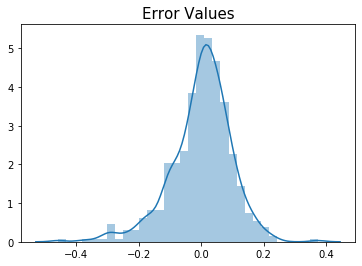

In [64]:
y_train_predict = lm_final_1.predict(X)
y_residual = Y-y_train_predict

sns.distplot(y_residual)
pt.title('Error Values',fontSize=15)
pt.show()

The error terms are following the normal destribution.

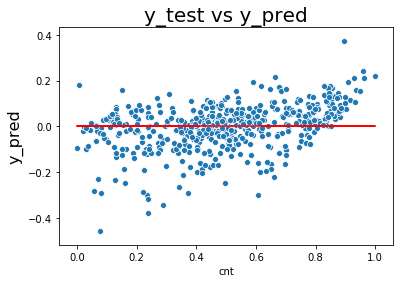

In [123]:
#Y is target variable and X is independent variables
sns.scatterplot(Y, y_residual)
pt.plot(Y,np.zeros(len(Y)) ,'-r')
pt.title('y_test vs y_pred', fontsize = 20)             
pt.ylabel('y_pred', fontsize = 16)      
pt.show()

No pattern observed so it follows __Homoscedasticity__ , so we can consider this model.

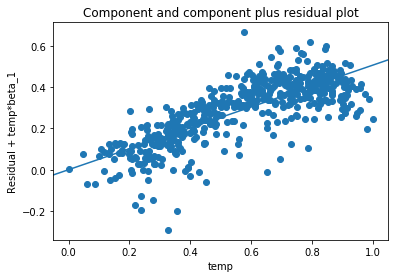

In [66]:
sm.graphics.plot_ccpr(lm_final_1, 'temp')
pt.show()

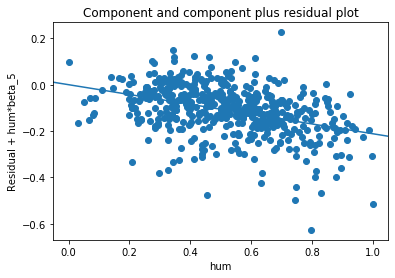

In [67]:
sm.graphics.plot_ccpr(lm_final_1, 'hum')
pt.show()

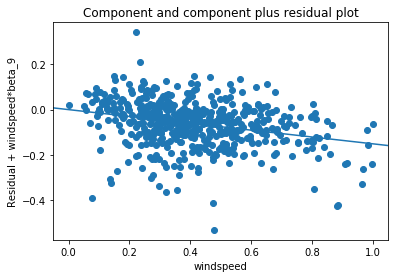

In [68]:
sm.graphics.plot_ccpr(lm_final_1, 'windspeed')
pt.show()

After observing the graphs we can conclude that there is a linear relationship between Y and X variables

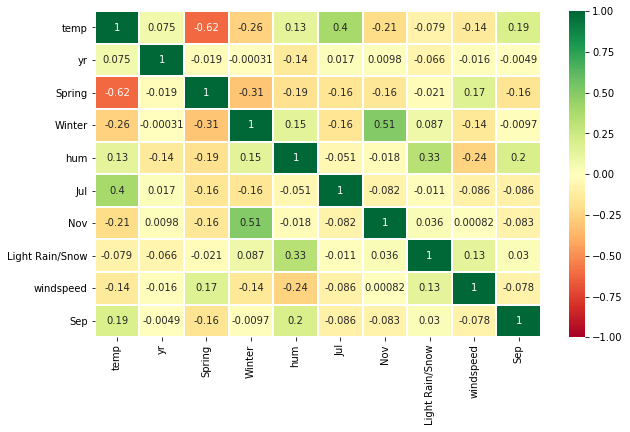

In [69]:
pt.figure(figsize=(10,6))
sns.heatmap(X[X.columns[X.columns!='const']].corr(),annot = True,
            cmap="RdYlGn",linewidth =1,
           vmin=-1,vmax=1)
pt.show()

No very strong correlation between the independent variables

# 6) Testing the model

In [70]:
columns_to_scale = ['temp','windspeed','cnt','hum']
test_dataSet[columns_to_scale] = scaler.transform(test_dataSet[columns_to_scale])
test_dataSet[columns_to_scale].head()

,temp,windspeed,cnt,hum
480,0.555927,0.385696,0.554212,0.699536
324,0.491584,0.289240,0.280914,0.912993
79,0.469984,0.666173,0.197752,0.672702
465,0.366522,0.682405,0.534389,0.299858
274,0.376611,0.499199,0.299408,0.748260


In [71]:
Y_test = test_dataSet.pop('cnt')

In [72]:

X_test = test_dataSet[['temp','yr','Spring','Winter','hum','Jul','Nov','Light Rain/Snow','windspeed','Sep']]

In [73]:

X_test = sm.add_constant(X_test)

In [74]:
y_test_predict = lm_final_1.predict(X_test)

In [75]:
mse = np.sqrt(mean_squared_error(Y_test,y_test_predict))
r_squared = r2_score(y_true=Y_test,y_pred=y_test_predict)
print('RMSE ',mse)
print('R quare ',r_squared)

RMSE  0.09755904432061314
R quare  0.8130494521987346


#### The R_square after testing the model came out to be __81.3%__ which is  __1.2%__ less than the adjusted r_Square value of the trained model.

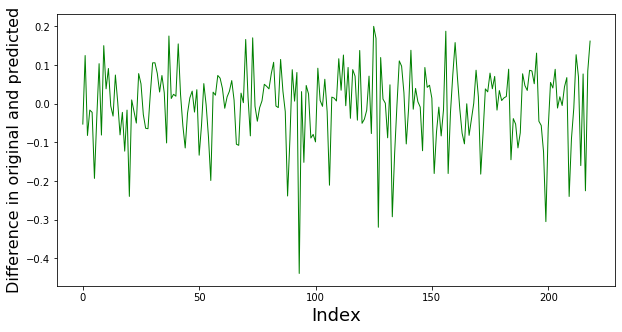

In [76]:
# Error terms
c = [i for i in range(len(Y_test))]
pt.figure(figsize=(10,5))
pt.plot(c,Y_test-y_test_predict, color="green", linewidth=1, linestyle="-")
pt.xlabel('Index', fontsize=18)
pt.ylabel('Difference in original and predicted', fontsize=16)     
pt.show()

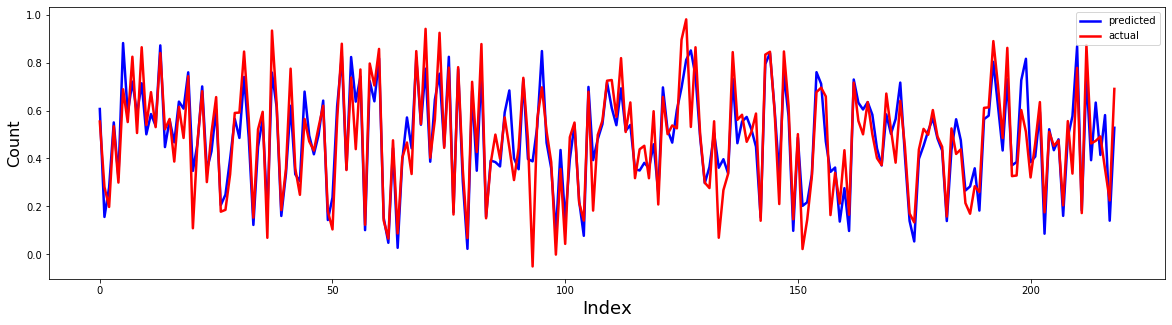

In [77]:
#Actual vs Predicted
pt.figure(figsize=(20,5))
pt.plot(c,y_test_predict, color="blue", linewidth=2.5, linestyle="-",label='predicted')
pt.plot(c,Y_test, color="red",  linewidth=2.5, linestyle="-",label='actual')
# fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
pt.xlabel('Index', fontsize=18)                               # X-label
pt.ylabel('Count', fontsize=16)                               # Y-label
pt.legend()
pt.show()

The Predicted values are oberlapping quite well.

# 7) RFE Model

In [78]:
# splitting the dataset to train and test the model
train_dataSet, test_dataSet =  train_test_split(dataSet_with_dummies ,train_size=0.7,  test_size = 0.3, random_state =400)

scaler = MinMaxScaler()

columns_to_scale = ['temp','hum','windspeed','cnt']
train_dataSet[columns_to_scale] = scaler.fit_transform(train_dataSet[columns_to_scale])

In [79]:
Y_train = train_dataSet.pop('cnt')
X_train = train_dataSet

In [80]:
lm_rfe = LinearRegression()
lm_rfe.fit(X_train, Y_train)
rfe = RFE(lm_rfe, 10)
rfe = rfe.fit(X_train,Y_train)

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 14),
 ('Winter', False, 3),
 ('Light Rain/Snow', True, 1),
 ('Misty', False, 8),
 ('Mon', False, 11),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thur', False, 19),
 ('Tues', False, 12),
 ('Wed', False, 16),
 ('Aug', False, 17),
 ('Dec', False, 5),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('Jul', False, 2),
 ('Jun', False, 18),
 ('Mar', False, 15),
 ('May', False, 10),
 ('Nov', False, 4),
 ('Oct', False, 13),
 ('Sep', False, 9)]

#### The below columns will be included in the model

In [82]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Light Rain/Snow', 'Sat', 'Sun'],
      dtype='object')

In [83]:
X_train.columns[~rfe.support_]

Index(['Summer', 'Winter', 'Misty', 'Mon', 'Thur', 'Tues', 'Wed', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

#### We will start modeling

In [84]:
X_rfe = sm.add_constant(X_train[columns])
lm_rfe_1 = sm.OLS(Y_train,X_rfe).fit()
print(lm_rfe_1.summary())
cal_variance(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.12e-175
Time:                        20:16:41   Log-Likelihood:                 440.15
No. Observations:                 510   AIC:                            -858.3
Df Residuals:                     499   BIC:                            -811.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5615      0.113     

,Features,VIF
3,workingday,116.01
10,Sun,67.41
9,Sat,61.55
2,holiday,13.94
7,Spring,1.67
4,temp,1.66
5,hum,1.30
8,Light Rain/Snow,1.21
6,windspeed,1.15
1,yr,1.03


- Sun has high p-value and high VIF so we will remove it

In [85]:
X_rfe = sm.add_constant(X_train[columns].drop('Sun',axis=1))
lm_rfe_1 = sm.OLS(Y_train,X_rfe).fit()
print(lm_rfe_1.summary())
cal_variance(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.79e-176
Time:                        20:16:41   Log-Likelihood:                 438.72
No. Observations:                 510   AIC:                            -857.4
Df Residuals:                     500   BIC:                            -815.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3788      0.028     

,Features,VIF
3,workingday,1.78
7,Spring,1.66
4,temp,1.65
9,Sat,1.65
5,hum,1.30
8,Light Rain/Snow,1.21
2,holiday,1.15
6,windspeed,1.15
1,yr,1.03


After removing Sun all the VIF values came under 2% so we will __not include Sun__
- Now Sat has high p-value so we will drop it.

In [86]:
X_rfe = sm.add_constant(X_train[columns].drop(['Sun','Sat'],axis=1))
lm_rfe_1 = sm.OLS(Y_train,X_rfe).fit()
print(lm_rfe_1.summary())
cal_variance(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     273.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.07e-177
Time:                        20:16:41   Log-Likelihood:                 438.48
No. Observations:                 510   AIC:                            -859.0
Df Residuals:                     501   BIC:                            -820.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3730      0.027     

,Features,VIF
7,Spring,1.66
4,temp,1.65
5,hum,1.30
8,Light Rain/Snow,1.21
6,windspeed,1.15
2,holiday,1.08
3,workingday,1.08
1,yr,1.03


This model has all the VIF values under __2%__ and the p-values are alos less than __0.3%__ so we will check this model how it performs

### Testing tada scaling and data preperation

In [87]:
test_dataSet[columns_to_scale] = scaler.transform(test_dataSet[columns_to_scale])
Y_test = test_dataSet.pop('cnt')
X_test = test_dataSet

### Residual analysis of the model

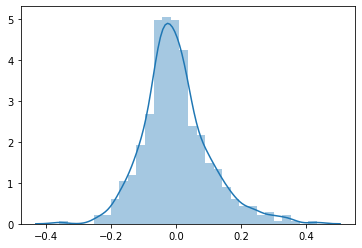

In [88]:
y_pred = lm_rfe_1.predict(X_rfe)
residuals = y_pred-Y_train
sns.distplot(residuals)
pt.show()

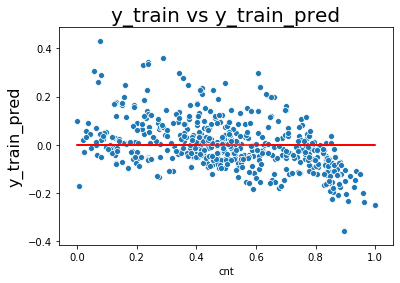

In [89]:
sns.scatterplot(Y_train, residuals)
pt.plot(Y_train,np.zeros(len(Y_train)) ,'-r')
pt.title('y_train vs y_train_pred', fontsize = 20)             
pt.ylabel('y_train_pred', fontsize = 16)      
pt.show()


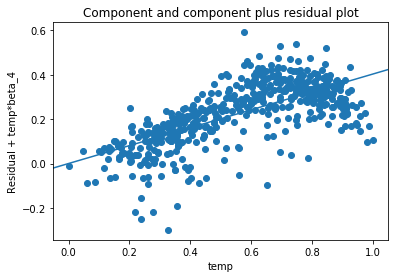

In [90]:
sm.graphics.plot_ccpr(lm_rfe_1, 'temp')
pt.show()

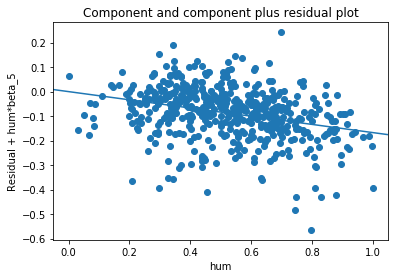

In [91]:
sm.graphics.plot_ccpr(lm_rfe_1, 'hum')
pt.show()

After observing the Y and X variables have a linear relationship.

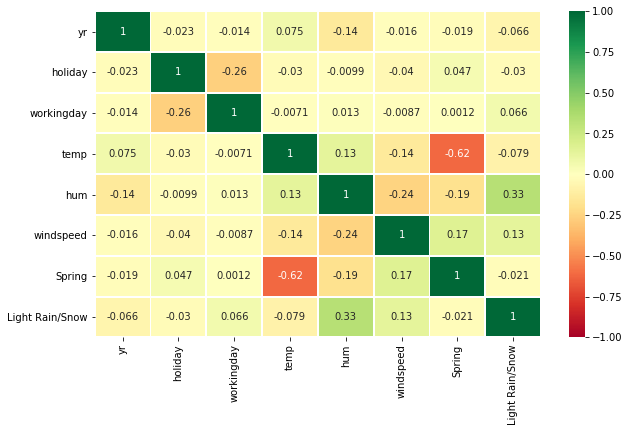

In [92]:
pt.figure(figsize=(10,6))
sns.heatmap(X_rfe[X_rfe.columns[X_rfe.columns!='const']].corr(),annot = True,
            cmap="RdYlGn",linewidth =1,
           vmin=-1,vmax=1)
pt.show()

In [93]:
X_test = sm.add_constant(test_dataSet[columns].drop(['Sun','Sat'],axis=1))
y_test_pred = lm_rfe_1.predict(X_test)
print(r2_score(Y_test,y_test_pred))

0.7833424867373052


#### This model  gives 78.3% of r_square value which is 2.8% less than the trained one but we will try to reduce this

### Now we will remove another variable and see the performance

In [94]:
X_rfe = sm.add_constant(X_train[columns].drop(['Sun','Sat','workingday'],axis=1))
lm_rfe_2 = sm.OLS(Y_train,X_rfe).fit()
print(lm_rfe_2.summary())
cal_variance(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     306.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.11e-176
Time:                        20:16:43   Log-Likelihood:                 433.81
No. Observations:                 510   AIC:                            -851.6
Df Residuals:                     502   BIC:                            -817.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3479      0.026     

,Features,VIF
6,Spring,1.66
3,temp,1.65
4,hum,1.30
7,Light Rain/Snow,1.21
5,windspeed,1.14
1,yr,1.03
2,holiday,1.01


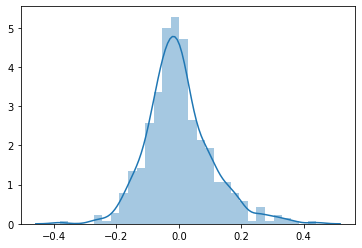

In [95]:
y_pred = lm_rfe_2.predict(X_rfe)
residuals = y_pred-Y_train
sns.distplot(residuals)
pt.show()

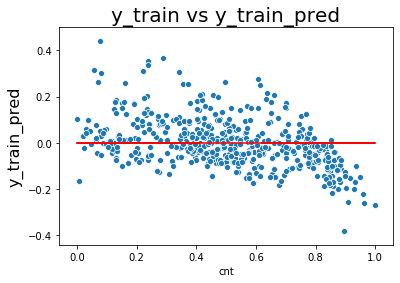

In [96]:
sns.scatterplot(Y_train, residuals)
pt.plot(Y_train,np.zeros(len(Y_train)) ,'-r')
pt.title('y_train vs y_train_pred', fontsize = 20)             
pt.ylabel('y_train_pred', fontsize = 16)      
pt.show()


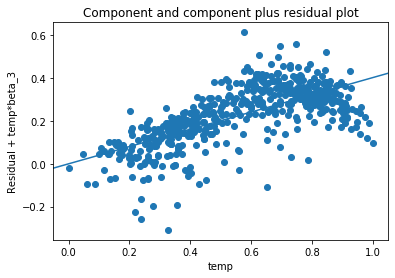

In [97]:
sm.graphics.plot_ccpr(lm_rfe_2, 'temp')
pt.show()

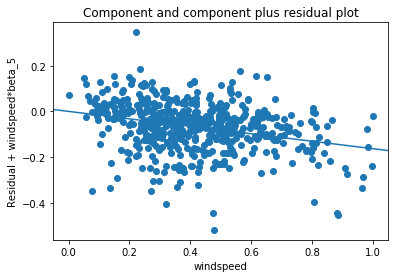

In [98]:
sm.graphics.plot_ccpr(lm_rfe_2, 'windspeed')
pt.show()

In this model also there is a linear relationship between Y and X.

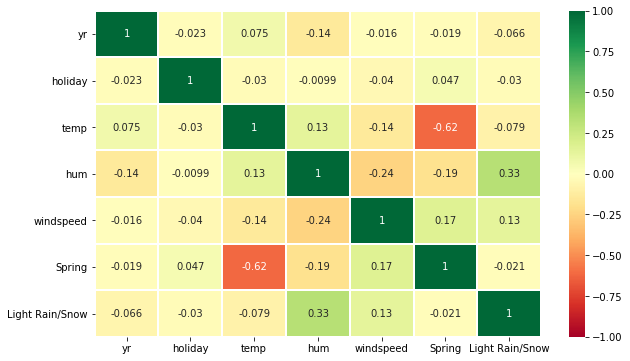

In [99]:
pt.figure(figsize=(10,6))
sns.heatmap(X_rfe[X_rfe.columns[X_rfe.columns!='const']].corr(),annot = True,
            cmap="RdYlGn",linewidth =1,
           vmin=-1,vmax=1)
pt.show()

In [100]:
X_test = sm.add_constant(test_dataSet[columns].drop(['Sun','Sat','workingday'],axis=1))
y_test_pred = lm_rfe_2.predict(X_test)
print(r2_score(Y_test,y_test_pred))

0.7921747232360076


#### This model  gives 79.2% of r_square value which is 1.6% less than the trained one but we will try to reduce this too

### Now we will remove another variable and see the performance

In [101]:
X_rfe = sm.add_constant(X_train[columns].drop(['Sun','Sat','workingday','holiday'],axis=1))
lm_rfe_3 = sm.OLS(Y_train,X_rfe).fit()
print(lm_rfe_3.summary())
cal_variance(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     351.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.70e-176
Time:                        20:16:44   Log-Likelihood:                 429.88
No. Observations:                 510   AIC:                            -845.8
Df Residuals:                     503   BIC:                            -816.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3440      0.026     

,Features,VIF
5,Spring,1.66
2,temp,1.65
3,hum,1.30
6,Light Rain/Snow,1.20
4,windspeed,1.14
1,yr,1.03


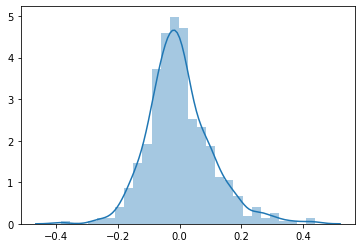

In [102]:
y_pred = lm_rfe_3.predict(X_rfe)
residuals = y_pred-Y_train
sns.distplot(residuals)
pt.show()

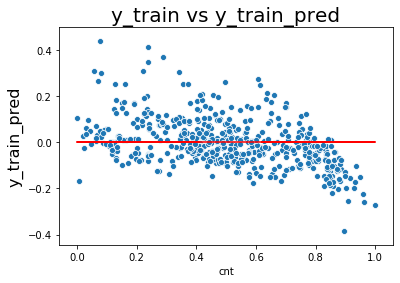

In [103]:
sns.scatterplot(Y_train, residuals)
pt.plot(Y_train,np.zeros(len(Y_train)) ,'-r')
pt.title('y_train vs y_train_pred', fontsize = 20)             
pt.ylabel('y_train_pred', fontsize = 16)      
pt.show()


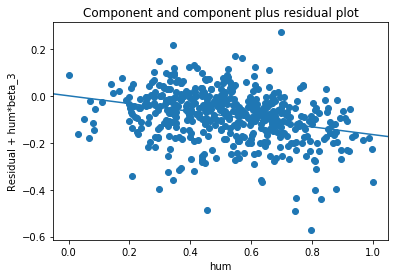

In [104]:
sm.graphics.plot_ccpr(lm_rfe_3, 'hum')
pt.show()

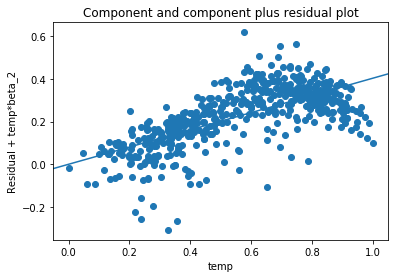

In [105]:
sm.graphics.plot_ccpr(lm_rfe_3, 'temp')
pt.show()

In this model also there is a linear relationship between the Y and X varaibles

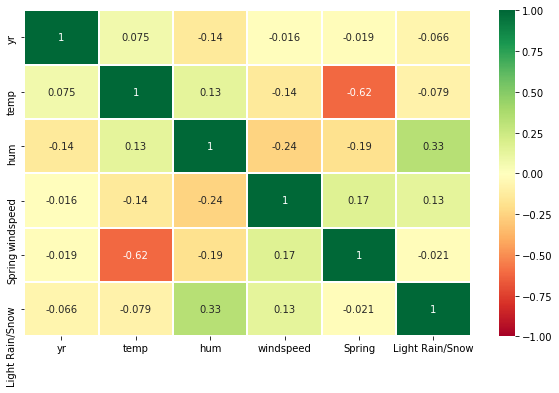

In [106]:
pt.figure(figsize=(10,6))
sns.heatmap(X_rfe[X_rfe.columns[X_rfe.columns!='const']].corr(),annot = True,
            cmap="RdYlGn",linewidth =1,
           vmin=-1,vmax=1)
pt.show()

In [107]:
X_test = sm.add_constant(test_dataSet[columns].drop(['Sun','Sat','workingday','holiday'],axis=1))
y_test_pred = lm_rfe_3.predict(X_test)
print(r2_score(Y_test,y_test_pred))

0.7885883084827889


#### This model  gives 78.8% of r_square value which is 1.7% less than the trained one but we will try to reduce this too, so we will use the last model ( lm_rfe_2 ) as it has higher r_square value and the  prediced value is also close to the trained value

In [108]:
X_rfe = sm.add_constant(X_train[columns].drop(['Sun','Sat','workingday'],axis=1))
lm_rfe_final = sm.OLS(Y_train,X_rfe).fit()
print(lm_rfe_final.summary())
cal_variance(X_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     306.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.11e-176
Time:                        20:16:46   Log-Likelihood:                 433.81
No. Observations:                 510   AIC:                            -851.6
Df Residuals:                     502   BIC:                            -817.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3479      0.026     

,Features,VIF
6,Spring,1.66
3,temp,1.65
4,hum,1.30
7,Light Rain/Snow,1.21
5,windspeed,1.14
1,yr,1.03
2,holiday,1.01


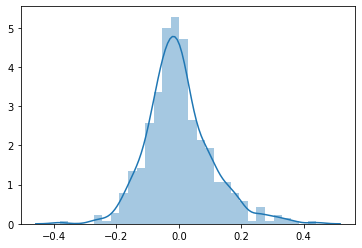

In [109]:
y_pred = lm_rfe_final.predict(X_rfe)
residuals = y_pred-Y_train
sns.distplot(residuals)
pt.show()

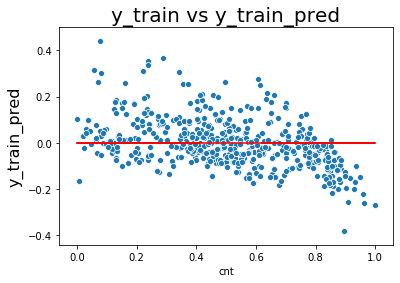

In [110]:
sns.scatterplot(Y_train, residuals)
pt.plot(Y_train,np.zeros(len(Y_train)) ,'-r')
pt.title('y_train vs y_train_pred', fontsize = 20)             
pt.ylabel('y_train_pred', fontsize = 16)      
pt.show()


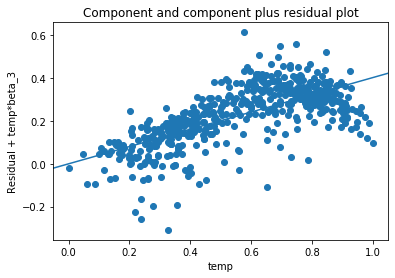

In [111]:
sm.graphics.plot_ccpr(lm_rfe_final, 'temp')
pt.show()

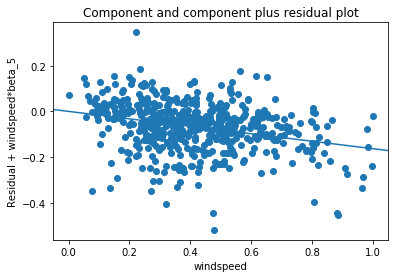

In [112]:
sm.graphics.plot_ccpr(lm_rfe_final, 'windspeed')
pt.show()

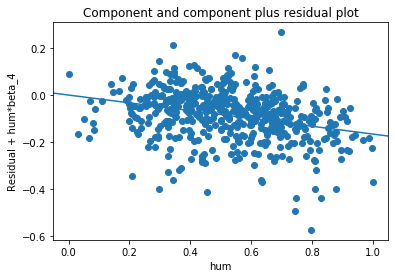

In [113]:
sm.graphics.plot_ccpr(lm_rfe_final, 'hum')
pt.show()

The baove graph represents there is a linear relationships between Y and X variables

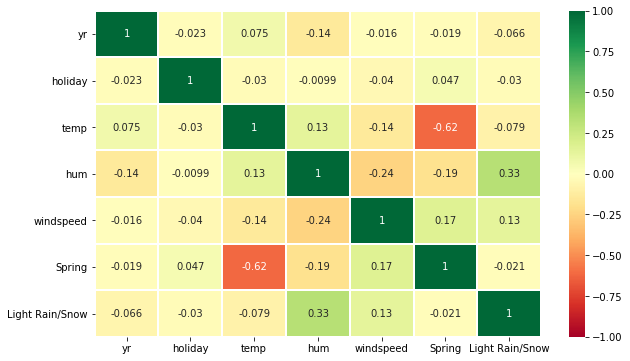

In [114]:
pt.figure(figsize=(10,6))
sns.heatmap(X_rfe[X_rfe.columns[X_rfe.columns!='const']].corr(),annot = True,
            cmap="RdYlGn",linewidth =1,
           vmin=-1,vmax=1)
pt.show()

### No visible patterns, no strong correlation and  the error times are also normalized 

In [115]:
X_test = sm.add_constant(test_dataSet[columns].drop(['Sun','Sat','workingday'],axis=1))
y_test_pred = lm_rfe_final.predict(X_test)
print(r2_score(Y_test,y_test_pred))

0.7921747232360076


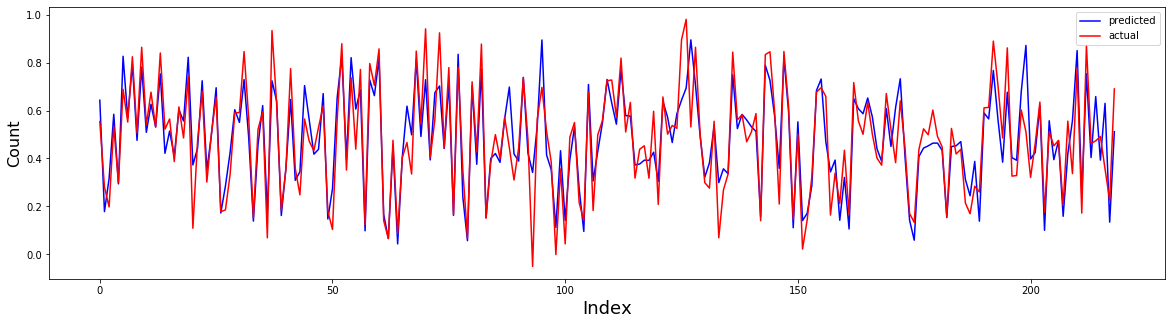

In [116]:
#Actual vs Predicted
pt.figure(figsize=(20,5))
pt.plot(c,y_test_pred, color="blue", linewidth=1.5, linestyle="-",label='predicted')
pt.plot(c,Y_test, color="red",  linewidth=1.5, linestyle="-",label='actual')
# fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
pt.xlabel('Index', fontsize=18)                               # X-label
pt.ylabel('Count', fontsize=16)                               # Y-label
pt.legend()
pt.show()

# Now we have 2 models so we have to choose one which is best fit

In [117]:
lm_final_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          6.13e-184
Time:                        20:16:48   Log-Likelihood:                 459.66
No. Observations:                 510   AIC:                            -897.3
Df Residuals:                     499   BIC:                            -850.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2843      0.030      9.586      0.000       0.226       0.343
temp                0.5067      0.033     15.456      0.000       0.442       0.571
yr                  0.2469      0.009     27.543      0.000       0.229       0.264
Spring             -0.1220      0.017     -7.232      0.000      -0.155      -0.089
Winter              0.0800      0.015      5.378      0.000       0.051       0.109
hum                -0.2117      0.027     -7.987      0.000      -0.264      -0.160
Jul                -0.0715      0.018     -3.878      0.000      -0.108      -0.035
Nov                -0.0642      0.020     -3.201      0.001      -0.104      -0.025
Light Rain/Snow    -0.1563      0.028     -5.620      0.000      -0.211      -0.102
windspeed          -0.1507      0.024     -6.179      0.000      -0.199      -0.103
Sep                 0.0529      0.017      3.107      0.002       0.019       0.086
==============================================================================
Omnibus:                       67.720   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.053
Skew:                          -0.752   Prob(JB):                     1.74e-30
Kurtosis:                       5.046   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
lm_rfe_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     306.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.11e-176
Time:                        20:16:48   Log-Likelihood:                 433.81
No. Observations:                 510   AIC:                            -851.6
Df Residuals:                     502   BIC:                            -817.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3479      0.026     13.304      0.000       0.296       0.399
yr                  0.2502      0.009     26.691      0.000       0.232       0.269
holiday            -0.0791      0.028     -2.793      0.005      -0.135      -0.023
temp                0.4033      0.025     15.900      0.000       0.353       0.453
hum                -0.1659      0.027     -6.131      0.000      -0.219      -0.113
windspeed          -0.1634      0.025     -6.468      0.000      -0.213      -0.114
Spring             -0.1673      0.014    -11.978      0.000      -0.195      -0.140
Light Rain/Snow    -0.1691      0.029     -5.819      0.000      -0.226      -0.112
==============================================================================
Omnibus:                       49.328   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.370
Skew:                          -0.624   Prob(JB):                     4.78e-19
Kurtosis:                       4.554   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
#checking the Prob (F-statistic) of the models
lm_final_1.f_pvalue < lm_rfe_1.f_pvalue

True

#### The Prob (F-statistic) of the first model is less that of the second model so we will choose that one over the other to define the significant variables

In [120]:
lm_final_1.params

const              0.284295
temp               0.506655
yr                 0.246862
Spring            -0.121978
Winter             0.079965
hum               -0.211652
Jul               -0.071473
Nov               -0.064186
Light Rain/Snow   -0.156291
windspeed         -0.150680
Sep                0.052878
dtype: float64

__The equation came out to be__

$ count = 0.284295 + ( 0.506655 \times temp ) + ( 0.246862  \times  yr ) - ( 0.121978 \times Spring ) +  ( 0.079965  \times  winter ) - ( 0.211652 \times hum ) - ( 0.071473 \times Jul ) - ( 0.156291 \times Light Rain/Snow ) - ( 0.064186 \times Nov ) - ( 0.150680 \times windspeed )  - ( 0.052878 \times Sep ) $

In [121]:
abs(lm_final_1.params).sort_values(ascending=False)

temp               0.506655
const              0.284295
yr                 0.246862
hum                0.211652
Light Rain/Snow    0.156291
windspeed          0.150680
Spring             0.121978
Winter             0.079965
Jul                0.071473
Nov                0.064186
Sep                0.052878
dtype: float64

So the most significant independent variables that we can look out for are the __temp, year, hum, Light Rain/Snow( weathersit = 3), windspeed, Spring( season = 1 ).__